*The codes were developed on Windows 10, and were not tested on other machines. Anaconda 5.2.0 is chosen as a Python interpreter.*

This notebook introduces the concept and methodology of implementing Monte-Carlo Simulation.

# Monte-Carlo Simulation

> **Monte Carlo Simulation** is a technique to understand the impact of risk and uncertainty in 
finance, engineering, supply chain, and virtually anything. A Monte Carlo simulator helps
one to visualize most or all of the potential outcomes to have a better idea regaring the
risk of a decision.

Based on historical data, expertise in the field, or past experience, you can draw an estimate of a population. While this estimate is useful for developing a model, it contains some inherent uncertainty and risk, because it's an estimate of an unknown value. In a financial market, you might know the distribution of possible values through the mean and standard deviation of returns. By using a range of possible values, instead of a single guess, you can create a more realistic picture of what might happen in the future. 

Let's assume that your consultant recommended you a certain investment program that has a mean return rate of 10% and standard deviation of 5%. You made 100 investments through this program, but your 100 investments had an average rate of return of 3%. Did the consultant lie to you, or is it one of the possible corner cases that you can have if you are unlucky? What is the P10, P50, P90 value of this invertment program? What is the the most plausible *range* of rate of return? Does your 3% rate of return fall within that *range*?

Monte-Carlo simulation comes in handy when addressing uncertainty of such cases with a known distribution.


## 1. Casino Dice Roll Example

How do casinos earn money? The answer is simple - the longer you play, the bigger chance of you losing money.

Let's assume an imaginary dice roll game between a casino house and an imaginary player. The rules are simple:

1. There is an imaginary dice that rolls between 1 to 100.
2. If a player rolls between 1 to 51, the house wins.
3. If a player rolls between 52 to 100, the house wins.
4. A player can bet as many times as he wants.

With the above rules, the house has 2% higher chance of winning over a player. As a financial analyst of the house, you want to address the following question:

<div class="alert alert-info">
    <p><b>Question: </b>With $100 wager for each bet, how many bets will be required until a player loses all his money?</p>
</div>

Monte-Carlo simulation can be used to simulate the possible outcomes of dice roll game. Python scripts can be used to simulate the game and visualize the results.

**Imports**

In [66]:
import random
import matplotlib.pyplot as plt
%matplotlib notebook

** Dice Roll Simulation **

In [250]:
def rolldice():
    dice = random.randint(1,100)
    if dice <= 51:                     # Player loses
        return False
    elif dice > 51 & dice <= 100:      # Player wins
        return True

** Single Game Simulation **

In [222]:
def play(total_funds, wager_amount, total_plays):

    play_num = []       # x-axis of the plot
    funds = []          # y-axis of the plot

    play = 1
    while play <= total_plays:
        
        if rolldice():                                # Player wins
            total_funds = total_funds + wager_amount  # updates current total funds
            play_num.append(play)
            funds.append(total_funds)

        else:                                         # Player loses
            total_funds = total_funds - wager_amount 
            play_num.append(play)
            funds.append(total_funds)
            
        play = play + 1

    Final_funds.append(funds[-1])
    
    return Final_funds, play_num, funds

One Monte-Carlo simulation will be run, with the following condition:

1. Player starts with \$10,000
2. Player bets \$100 each time
3. Player plays the game 1,000 times


<IPython.core.display.Javascript object>


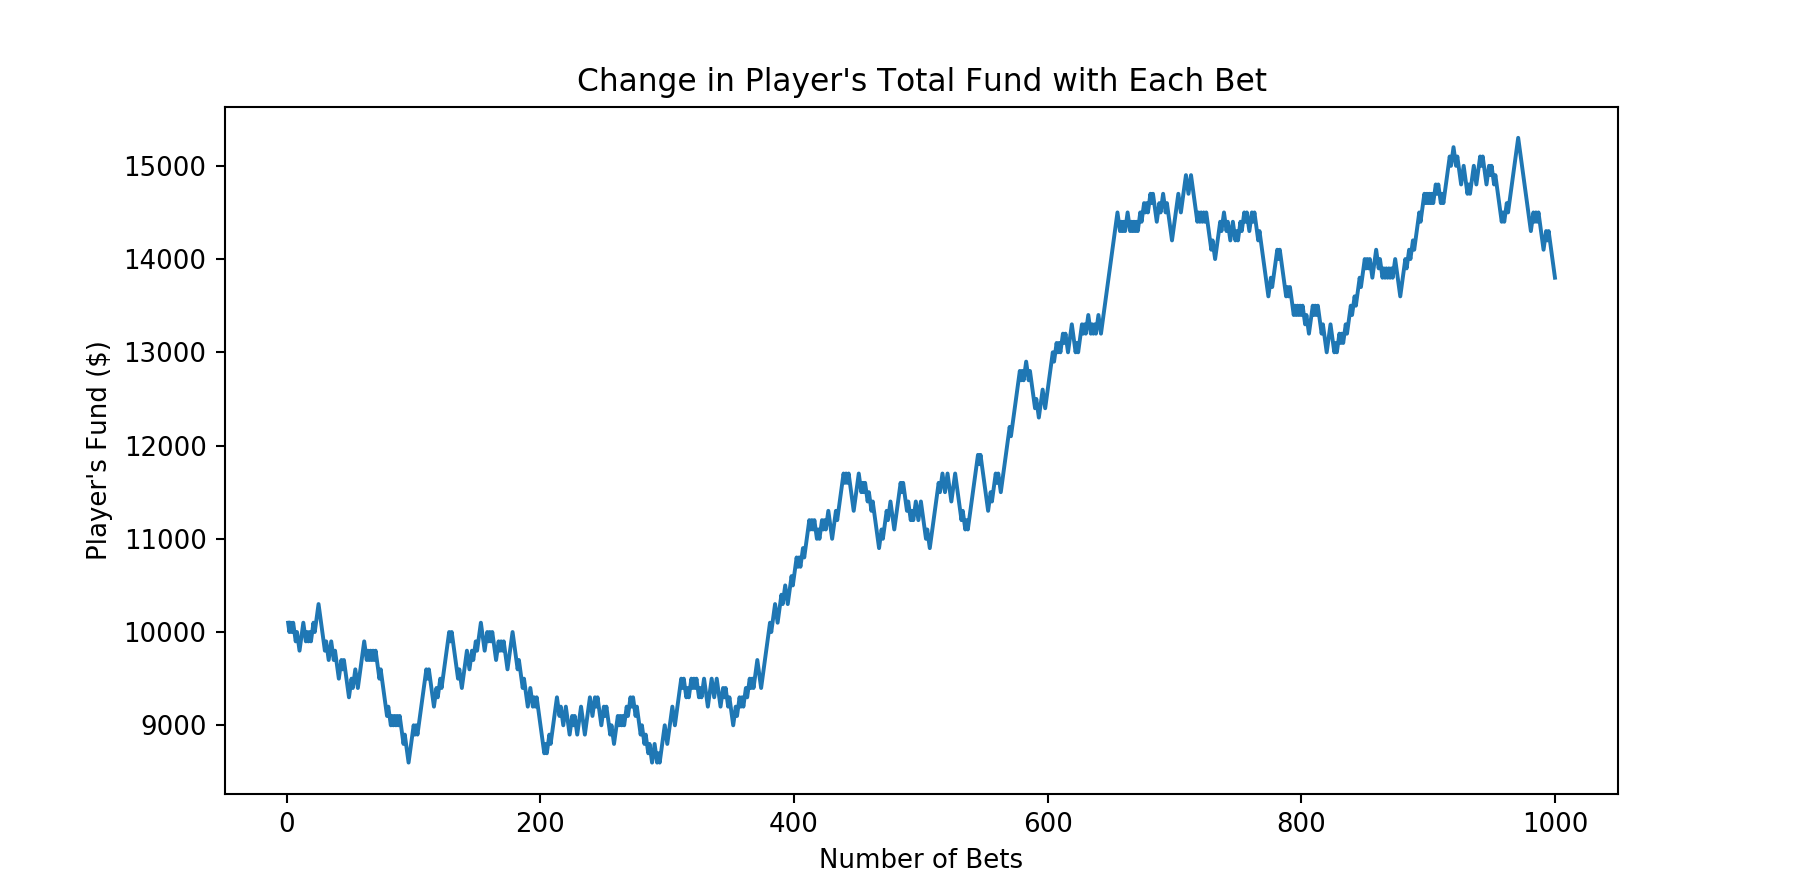

The player starts the game with $10,000 and ends with $13800


In [278]:
Final_funds= []

f, ax = plt.subplots()
ending_fund, num_play, funds_record = play(total_funds=10000, wager_amount=100, total_plays=1000)

ax.plot(num_play,funds_record)
ax.set_title('Change in Player\'s Total Fund with Each Bet')
ax.set_ylabel('Player\'s Fund ($)')
ax.set_xlabel('Number of Bets')

print("The player starts the game with $10,000 and ends with $" + str(round(sum(ending_fund)/len(ending_fund))))

To your surprise, the player actually ended up earning money from the house by  dollars after 1,000 games. According to the configuration of the game, the house has 2% higher change of winning over the player. 

<IPython.core.display.Javascript object>


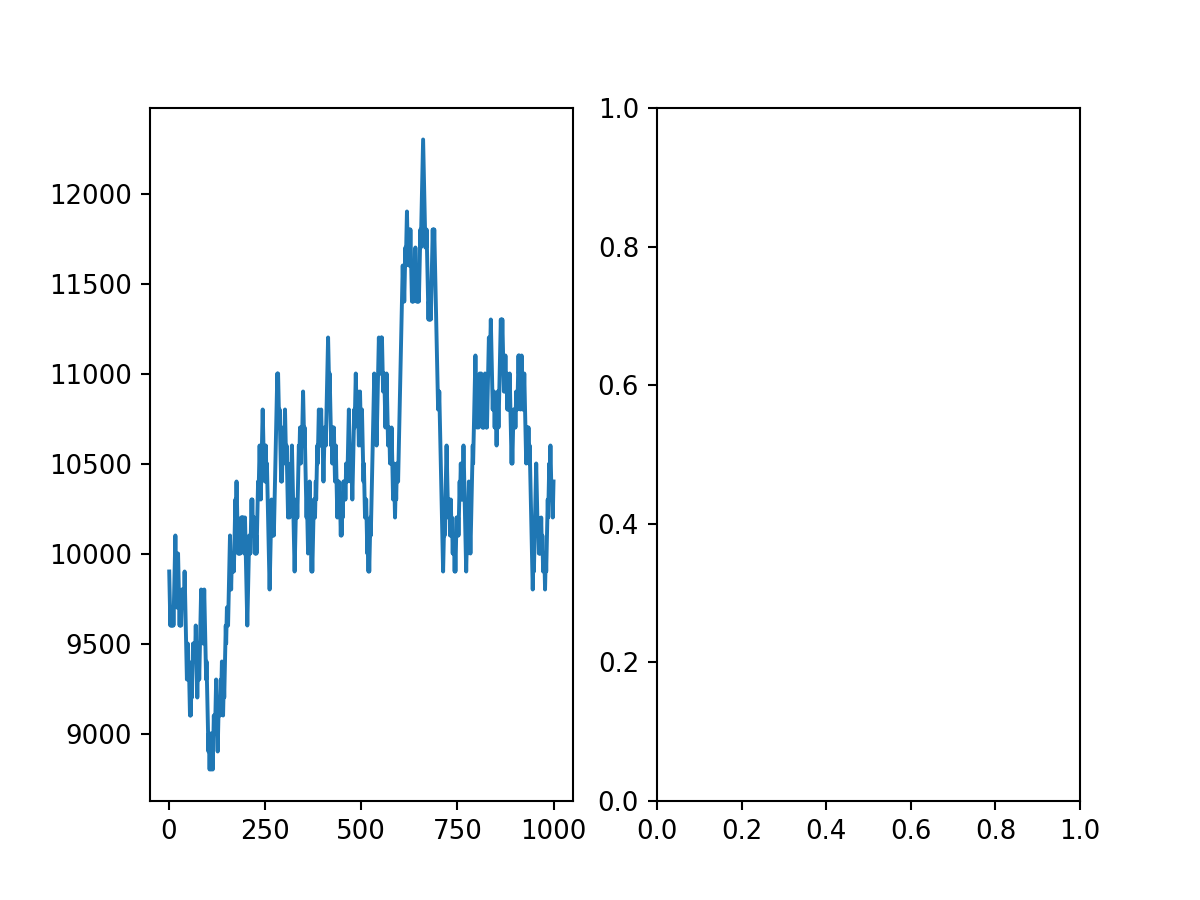

The player starts the game with $10,000 and ends with $10400.0


In [145]:
#Call the function to simulate the plays and calculate the remaining funds of the player after all the bets
#Intialize the scenario number to 1
x=1
#Create a list for calculating final funds
Final_funds= []

f, (ax1, ax2) = plt.subplots(1, 2)
ending_fund, num_play, funds_record = play(total_funds=10000, wager_amount=100, total_plays=1000)

#Plot the line plot of "Account Value" vs "The number of plays"
ax1.plot(num_play,funds_record)
# ax1.ylabel('Player Money in $')
# ax1.xlabel('Number of bets')


#Print the money the player ends with
print("The player starts the game with $10,000 and ends with $" + str(sum(ending_fund)/len(ending_fund)))